In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [15]:
import pandas as pd

df = pd.read_csv('온라인_댓글_데이터셋(1).csv', encoding='utf-8')
df

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,네놈이 죽였으니 영원히 못잊겠지 돼지새끼 뻔뻔함 지리구요. 인간성 더러운거 오지구요.
0,김양건이 영웅대접 받아서 또 질투났나보네.자기 위치를 조금 불안하게 할 것 같은 사...
1,암살하고 조문. . . 짜슥 많이 늘었군
2,교통사고인데 되게 말짱하네요
3,아니 스.벌. 과거에 독립군들 그리 많았던 민족 맞냐..??어떻게 정은이 한명 암살...
4,차도 없는 나라에서 어떻게 하면 교통사고로 죽을 수 있지
...,...
9999994,정희 재연이 다쳐넣어라
9999995,좌빨 운운하는새끼들봐라. 일의 시작이 나쁘다는거냐?과정이 더럽다는거다. 그리고 그놈...
9999996,아니근데 뉴스 기레기놈들은 왜 꼬박꼬박 돼지한테 위원장이라고 존칭을 붙이냐??
9999997,가죽을 벗기고 눈알을 파내고 코와 귀를 베어내는 등 빨갱이는 빨갱이들이 쓰는 형벌로...


In [20]:
df.columns=['text']

In [16]:
df = df[:1000]
df

,네놈이 죽였으니 영원히 못잊겠지 돼지새끼 뻔뻔함 지리구요. 인간성 더러운거 오지구요.
0,김양건이 영웅대접 받아서 또 질투났나보네.자기 위치를 조금 불안하게 할 것 같은 사...
1,암살하고 조문. . . 짜슥 많이 늘었군
2,교통사고인데 되게 말짱하네요
3,아니 스.벌. 과거에 독립군들 그리 많았던 민족 맞냐..??어떻게 정은이 한명 암살...
4,차도 없는 나라에서 어떻게 하면 교통사고로 죽을 수 있지
...,...
995,그애는 죽어서 아니되고 민중은 니가 막죽여도 되나..그것도 니가 마음대로 ....그...
996,글쎄 긍정적인 면 보다 부정적인 면이 많은게 군대다. 군대가서 무슨 철이 들었네 살...
997,나 포함 친구들 하나같이 허리나 발목 OOO되서 나왔구만
998,여기 댓글 단 놈들 내년에는 신과 마주하길 빌어 봅니다.


In [181]:
df4 = df[3000000:6000000]
df4

,text
3000000,요즘은 지잡들도 이렇게 설치는 세상이군요! 그저 남탓 사회탓.. 정작 본인 탓 해본...
3000001,"국민의당 렌트카 떼기 경선, 조폭 연관, 신천지 연루에 이어 어제 터진 원광대 학생..."
3000002,군대OOO들이 너무 많다OOO들 잡아다가 총살해야된다
3000003,박그네 재산이 문재인후보 보다 2배가까이되는데~~세금은 문후보가 납부한것의 80%수...
3000004,대포폰 알바죳년들아/입은 삐뚤어져도 말은 바로 해야지/걍 죄인이만 사형시키자/국정원...
...,...
5999995,2시간 연장 반대하는당이야 말로국믄의투표권 빼앗나 공산당 이군 새누리는 우빨 빨갱이
5999996,투표시간이 2시간늘어난다 → 사장이 2시간 일 더시킨다. 쌤쌤 오키?임시공휴일 준수...
5999997,근로자의 생활의 질은 갈수록 나빠지고 있다 주40시간이지만 토요일 일요일도 일해야 ...
5999998,집권 여당이라는 사람들이 투표율을 낮추기 위해서 저리 애를 쓰는 것 보니 나라가 정...


In [7]:
stopwords = ['(',')','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '음', '면']

In [21]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

df4['tokenized'] = df4['text'].apply(mecab.morphs)

<ipython-input-21-47885911d5cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['text'].apply(mecab.morphs)


In [22]:
df

,text,tokenized
0,김양건이 영웅대접 받아서 또 질투났나보네.자기 위치를 조금 불안하게 할 것 같은 사...,"[김양건, 이, 영웅, 대접, 받, 아서, 또, 질투, 났, 나, 보, 네, ., ..."
1,암살하고 조문. . . 짜슥 많이 늘었군,"[암살, 하, 고, 조문, ., ., ., 짜, 슥, 많이, 늘, 었, 군]"
2,교통사고인데 되게 말짱하네요,"[교통사고, 인데, 되게, 말짱, 하, 네요]"
3,아니 스.벌. 과거에 독립군들 그리 많았던 민족 맞냐..??어떻게 정은이 한명 암살...,"[아니, 스, ., 벌, ., 과거, 에, 독립군, 들, 그리, 많, 았, 던, 민..."
4,차도 없는 나라에서 어떻게 하면 교통사고로 죽을 수 있지,"[차, 도, 없, 는, 나라, 에서, 어떻게, 하, 면, 교통사고, 로, 죽, 을,..."
...,...,...
995,그애는 죽어서 아니되고 민중은 니가 막죽여도 되나..그것도 니가 마음대로 ....그...,"[그, 애, 는, 죽, 어서, 아니, 되, 고, 민중, 은, 니, 가, 막죽, 여도..."
996,글쎄 긍정적인 면 보다 부정적인 면이 많은게 군대다. 군대가서 무슨 철이 들었네 살...,"[글쎄, 긍정, 적, 인, 면, 보다, 부정, 적, 인, 면, 이, 많, 은, 게,..."
997,나 포함 친구들 하나같이 허리나 발목 OOO되서 나왔구만,"[나, 포함, 친구, 들, 하나, 같이, 허리, 나, 발목, OOO, 되, 서, 나..."
998,여기 댓글 단 놈들 내년에는 신과 마주하길 빌어 봅니다.,"[여기, 댓글, 단, 놈, 들, 내년, 에, 는, 신, 과, 마주, 하, 길, 빌,..."


In [185]:
df4['tokenized2'] = df4['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-185-bb1b91c1b268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tokenized2'] = df4['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [190]:
df6 = pd.concat([df3,df4])

In [192]:
df6.to_csv('ai허브6백만개_csv', encoding='utf-8', index=False)

# 워드투벡터 모델

In [194]:
target = df6['tokenized2'].tolist()

In [195]:
from gensim.models.word2vec import Word2Vec

'''
workers : 실행할 병렬 프로세스 수
min_count : 등장 횟수가 n 이하인 단어 무시
size : 임베딩벡터의 크기
batch_words : 사전을 구축할 때 한번에 읽을 단어 수
sg : 0 은 cbow, 1은 skipgram

'''
model_sg = Word2Vec(target, size=100, workers = 4, min_count = 10, window = 2, sg = 1) 

In [197]:
model_sg.similar_by_vector('병신')

<ipython-input-197-ea7fdc443043>:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  model_sg.similar_by_vector('병신')


[('등신', 0.8305633068084717),
 ('빙신', 0.784553587436676),
 ('머저리', 0.7561317086219788),
 ('병진', 0.7468888759613037),
 ('찐따', 0.7468478083610535),
 ('모지리', 0.74076908826828),
 ('빙시', 0.7279548645019531),
 ('뵹신', 0.7137889862060547),
 ('멍청이', 0.7075376510620117),
 ('쪼다', 0.6972334384918213)]

In [13]:
model_sg.similar_by_vector('ㅆㅂ',topn=1000 )

NameError: name 'model_sg' is not defined

In [148]:
vocabs = model_sg.wv.vocab.keys()
word_vectors_list = [model_sg.wv[v] for v in vocabs]

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [155]:
results=[]
for i, v in enumerate(vocabs):
    results.append((v, xs[i], ys[i]))

In [159]:
pca_df = pd.DataFrame(results, columns=['vocab', 'x_axis','y_axis'])

In [144]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs , ys, marker='o')
    for i , v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i],ys[i]))

In [99]:
len(vocabs)

90178

In [96]:
xys

array([[ 1.27755917, -0.23890752],
       [ 0.2109658 , -0.32150535],
       [ 0.09646257,  0.07028228],
       ...,
       [ 0.04821887,  0.00724652],
       [ 0.67348046,  0.22741368],
       [ 0.46575835,  0.21437096]])

In [97]:
xs

array([1.27755917, 0.2109658 , 0.09646257, ..., 0.04821887, 0.67348046,
       0.46575835])

In [90]:
vocabs

dict_keys(['[', "'", '김', '양', '건', ',', ' ', '영', '웅', '대', '접', '받', '아', '서', '또', '질', '투', '났', '나', '보', '.', '자', '기', '위', '치', '조', '금', '불', '안', '할', '것', '같', '사', '람', '오', '어', '떤', '수', '단', '방', '법', '가', '리', '않', '죽', '여', '버', '이', '러', '다', '까', '지', '먹', '거', '닙', '니', '?', '솔', '직', '히', '북', '한', '고', '간', '부', '교', '통', '로', '주', '흔', '일', '라', '던', '데', '연', '상', '정', '은', '줘', ']', '암', '살', '문', '짜', '슥', '많', '늘', '었', '군', '인', '되', '게', '말', '짱', '네', '요', '스', '벌', '과', '독', '립', '그', '았', '민', '족', '맞', '냐', '떻', '명', '물', '하', '없', '차', '에', '있', '시', '신', '저', '렇', '닦', '놓', '징', '럽', 'ㅋ', '뒤', '진', '놈', '해', '!', '켰', '깨', '끗', '포', '쏴', '알', '더', '구', '번', '엔', '장', '성', '택', '총', '틀', '렸', '뿐', '국', '제', '적', '론', '중', '등', '팽', '당', '때', '했', '머', '손', '야', '는', '전', '밸', '트', '슬', '터', '=', '숙', '청', '쥬', '겨', '으', '동', '권', '력', '애', '분', '못', '죄', '뭐', '량', '별', '현', '낮', '긴', '굉', '왠', '2', '0', '1', '5', '년', '감', '선', '모', '임', 'h', 't', 'p',

In [88]:
plot_2d_graph(vocabs, xs, ys)

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54000 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51132 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 4510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44808 missing from cu

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49920 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50143 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45832 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51753 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48036 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49956 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45128 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51921 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54409 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49816 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51705 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51852 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48065 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44194 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32893 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44764 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54622 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44034 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12419 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53691 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23577 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33853 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53504 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45853 missing from c

C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44267 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 39131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlagy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9924 missing from cu

Error in callback <function flush_figures at 0x000001E6A9294940> (for post_execute):


KeyboardInterrupt: 

# 모델 저장 및 로드

In [196]:
# 저장
model_sg.save('aihub_review_6.model')

In [4]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec.load('aihub_review_6.model')

In [14]:
model.similar_by_vector('병신')

<ipython-input-14-b13654a6d90d>:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  model.similar_by_vector('병신')


[('등신', 0.8305633068084717),
 ('빙신', 0.784553587436676),
 ('머저리', 0.7561317086219788),
 ('병진', 0.7468888759613037),
 ('찐따', 0.7468478083610535),
 ('모지리', 0.74076908826828),
 ('빙시', 0.7279548645019531),
 ('뵹신', 0.7137889862060547),
 ('멍청이', 0.7075376510620117),
 ('쪼다', 0.6972334384918213)]

In [6]:
model.wv.save_word2vec_format('aihub_review_6_w2v')

In [11]:
!python -m gensim.scripts.word2vec2tensor --input aihub_review_6_w2v --output aihub_review_6_w2v

2021-04-03 03:16:33,576 - word2vec2tensor - INFO - running C:\Users\rlagy\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input aihub_review_6_w2v --output aihub_review_6_w2v
2021-04-03 03:16:33,576 - utils_any2vec - INFO - loading projection weights from aihub_review_6_w2v
Traceback (most recent call last):
  File "C:\Users\rlagy\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rlagy\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\rlagy\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py", line 94, in <module>
    word2vec2tensor(args.input, args.output, args.binary)
  File "C:\Users\rlagy\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py", line 68, in word2vec2tensor
    model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=binary)
  File "C:\Users\rlagy\anaconda3\lib\site-packages\gensim\models\keyedv

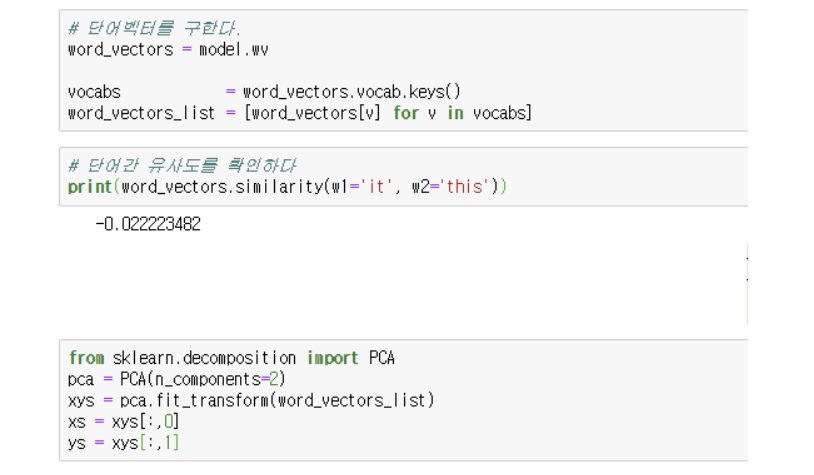

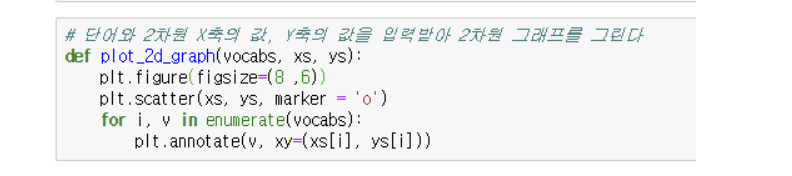